# K Nearest Neighbors with Python
### You've given a classified data set form a company! They've hidden the feature column names but have given you the data and the target classes. We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\jgaur\python_ml\ML\KNN\dataset\Classified Data', index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

# Standardize the Variables
### Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it. The scale of the variables matters. Any variables that are on a large scale will have a much larger distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [8]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [9]:
df_features = pd.DataFrame(scaled_feature, columns=df.columns[:-1])

In [10]:
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [11]:
scaler.scale_

array([0.2894904 , 0.25695669, 0.29140804, 0.22953017, 0.24329122,
       0.2559925 , 0.25499044, 0.28883712, 0.29359061, 0.20412289])

# train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df['TARGET CLASS'], test_size=0.3)

# Using KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)

# Predictions and Evaluations
### Let's evaluate our KNN model!!

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

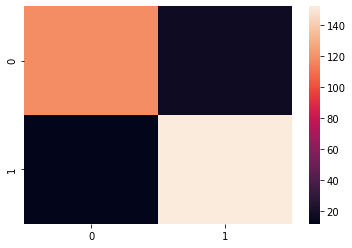

In [19]:
sns.heatmap(confusion_matrix(y_test, pred))

In [20]:
confusion_matrix(y_test, pred)

array([[119,  17],
       [ 12, 152]], dtype=int64)

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       136
           1       0.90      0.93      0.91       164

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# Chossing a K value
### Let's go ahead and use the elbow method to pick a good k value:

In [22]:
error_rate = []

# Will take some time
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

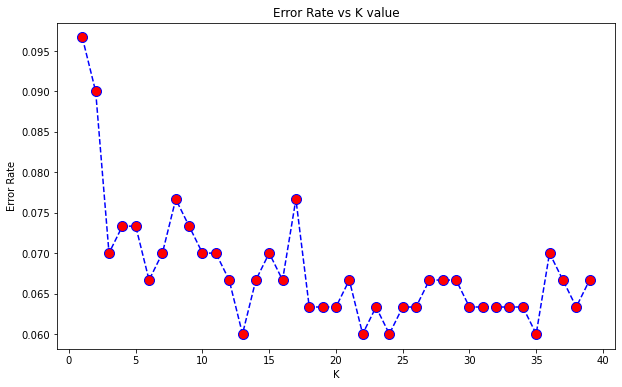

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title("Error Rate vs K value")
plt.xlabel('K')
plt.ylabel('Error Rate')

### Here we can see that after around K > 25 error rate just tends to hover.

## K value = 25

In [24]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print("With K = 25")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

With K = 25


[[127   9]
 [ 10 154]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       136
           1       0.94      0.94      0.94       164

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

